In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def load_text(path):
    with open(path) as f:
        return [l.replace("\n", "") for l in f.readlines()]

In [3]:
def parse_txt(text_lines):
    time, ch1, ch2 = [], [], []
    for i, line in enumerate(text_lines):
        if i < 6:
            continue
        line = line.split("; ")
        try:
            time.append(float(line[0]))
            ch1.append(float(line[1]))
            ch2.append(float(line[2]))
        except:
            print("End line at {} ".format(i))
            break
    return np.asarray(time), np.asarray(ch1), np.asarray(ch2)

In [36]:
raw_data = parse_txt(load_text("/aidata/anders/objects/company/meas_scope_20210823.txt"))

End line at 4168002 


In [60]:
tri_idxs = np.load("/aidata/anders/objects/company/tri_idxs.npy")

det_idxs = np.load("/aidata/anders/objects/company/det_idxs.npy")
drift_idxs = np.load("/aidata/anders/objects/company/drifts.npy")
time, crds, triangle_waves = raw_data

(4167996,)


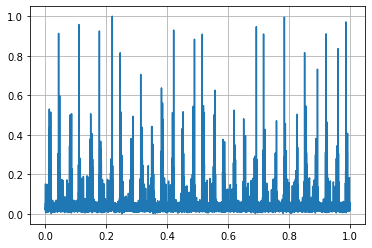

In [54]:
o_raw_data = np.load("/aidata/anders/objects/company/crds.npy")
N = o_raw_data.shape[0]
t = np.linspace(0, 1, N)
plt.plot(t, o_raw_data)
plt.grid()
print(o_raw_data.shape)

In [55]:
def proj2normal(x):
    b, n = x.shape
    t = np.linspace(0, 1, n)
    t = np.tile(t[None, :], [x.shape[0], 1])
    mu, std = np.mean(x, keepdims=True, axis=-1), np.std(x,
                                                         keepdims=True,
                                                         axis=-1)
    factor = 1 / (std * (2 * np.pi)**0.5)
    return factor * np.exp(-0.5 * ((t - mu) / std)**2)

path = "/aidata/anders/objects/company/hmm/pattern_2"
patterns = np.stack([
            np.load(os.path.join(path, p))
            for p in os.listdir(path)
        ])
proj_ps = proj2normal(patterns)


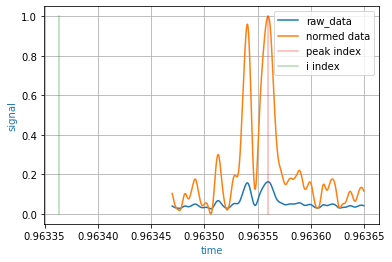

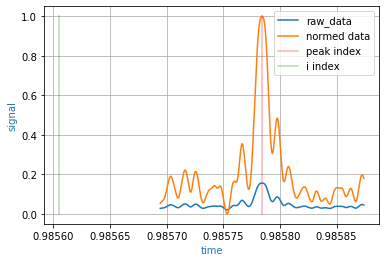

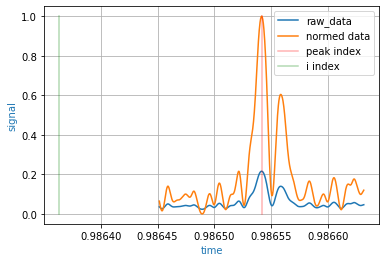

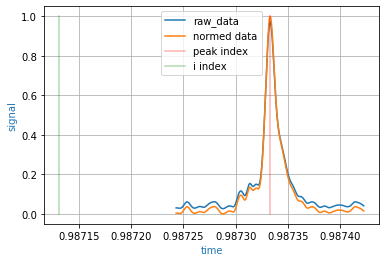

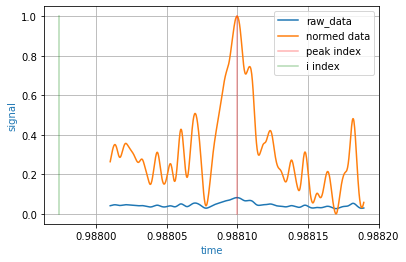

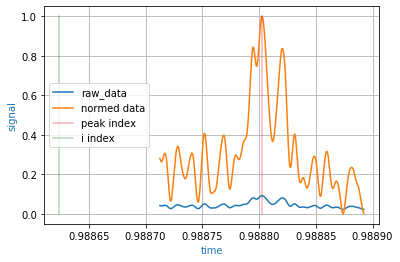

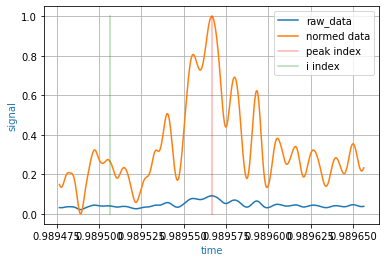

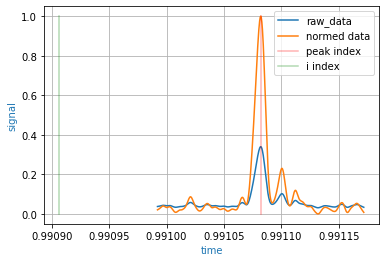

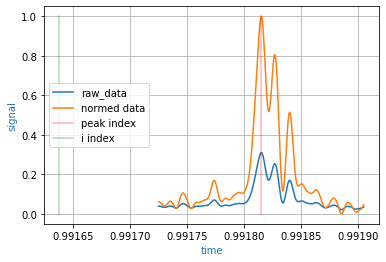

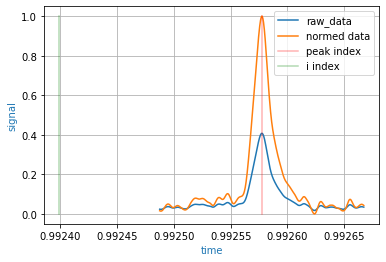

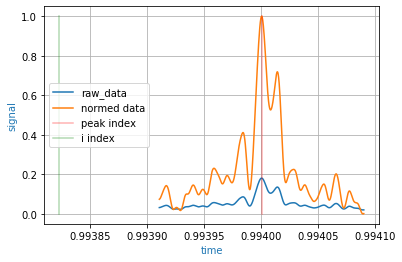

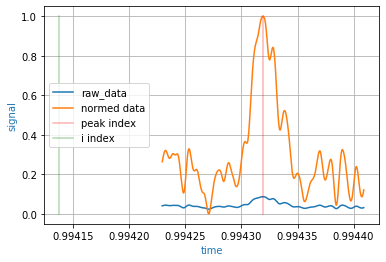

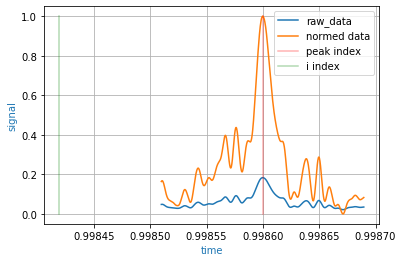

In [56]:
min_max = [np.min(o_raw_data), np.max(o_raw_data)]

for i, (det_idx, drift_idx) in enumerate(zip(det_idxs, drift_idxs)):
    rs = det_idx - 375
    re = det_idx + 375
    window_src = o_raw_data[rs:re]
    window_t = t[rs:re]
    if i > 351:
        plt.plot(window_t, window_src, label = 'raw_data')
        normed_src = (window_src - window_src.min()) / (window_src.max() - window_src.min()) 
        proj_src = proj2normal(normed_src[None, :])
        norm_diffs = np.sqrt(np.sum(np.square(normed_src - patterns), axis =-1))
        proj_diffs = np.sqrt(np.sum(np.square(proj_src - proj_ps), axis =-1)) 
        plt.plot(window_t, normed_src,  label = 'normed data')
        plt.plot([t[det_idx], t[det_idx]], min_max, 'r-', alpha = 0.3, label = 'peak index')
        plt.plot([t[drift_idx], t[drift_idx]], min_max, 'g-', alpha = 0.3, label = 'i index')
        plt.ylabel('signal', color='tab:blue')
        plt.xlabel('time', color='tab:blue')
        plt.legend()
        plt.grid()
        plt.show()
        

In [64]:
new_time = []
new_filted_src = []
new_triangle_waves = []
new_peak_collect = []
new_drift_collect = []

for i in range(len(tri_idxs)):
    tmp = []
    tmp1 = []
    new_time.append(time[tri_idxs[i][0] :tri_idxs[i][1]])
    new_filted_src.append(crds[tri_idxs[i][0] :tri_idxs[i][1]])
    new_triangle_waves.append(triangle_waves [tri_idxs[i][0] :tri_idxs[i][1]])
    
    for x in det_idxs:
        if((x < tri_idxs[i][1]) & (x > tri_idxs[i][0] )):
            tmp.append(x)
    for x in drift_idxs:
        if((x < tri_idxs[i][1]) & (x > tri_idxs[i][0] )):
            tmp1.append(x)
    new_peak_collect.append(tmp)
    new_drift_collect.append(tmp1)

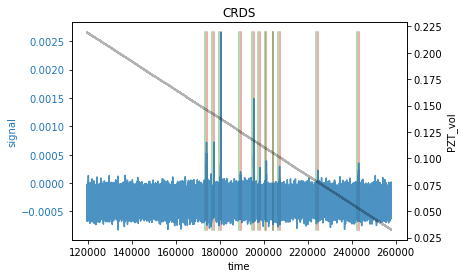

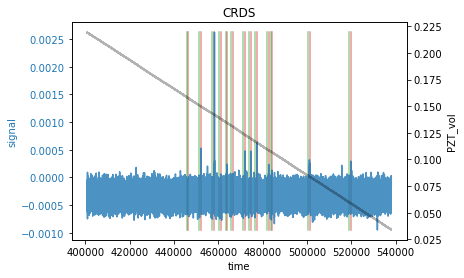

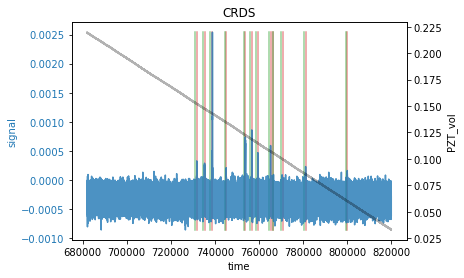

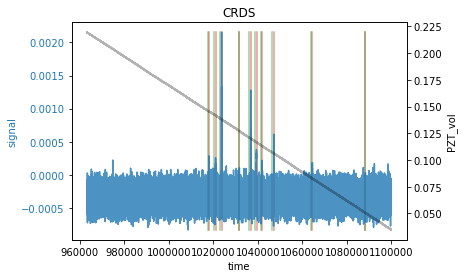

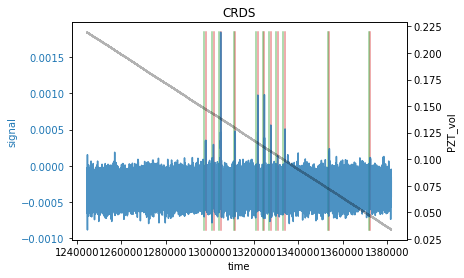

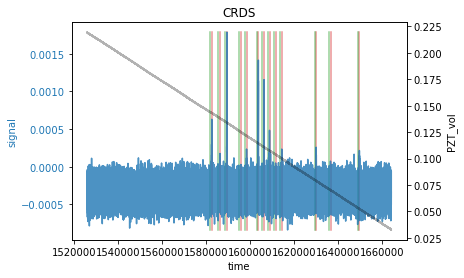

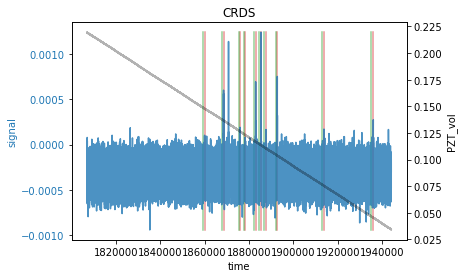

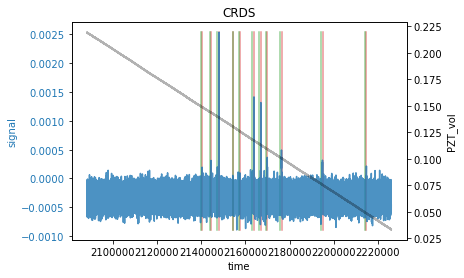

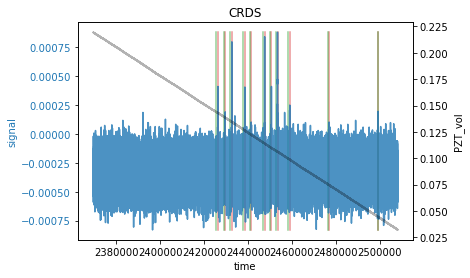

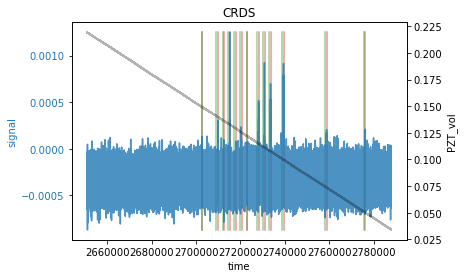

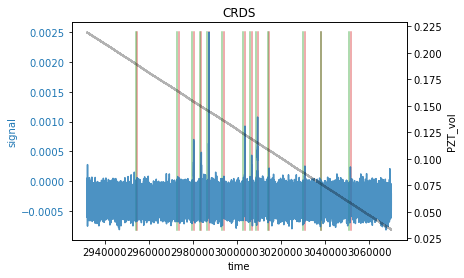

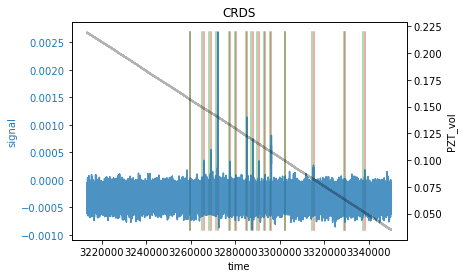

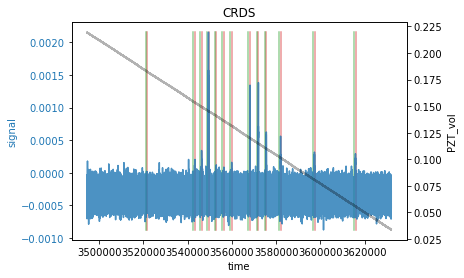

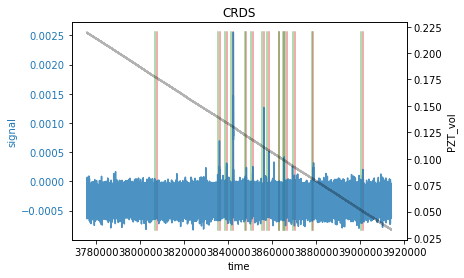

In [66]:
for num in range(len(tri_idxs)):
    min_max = [np.min(new_filted_src[num]), np.max(new_filted_src[num])]
    x= np.arange(tri_idxs[num][0],tri_idxs[num][1],1)
    fig, ax1 = plt.subplots()
    plt.title('CRDS')
    plt.xlabel('time')
    ax2 = ax1.twinx()
    ax1.set_ylabel('signal', color='tab:blue')
    for i in new_peak_collect[num]:
        ax1.plot([i,i],min_max, color='tab:red', alpha=0.5)  
    for i in new_drift_collect[num]:
        ax1.plot([i,i], min_max, color='tab:green', alpha=0.5)  
        
    ax1.plot(x,new_filted_src[num], color='tab:blue', alpha=0.8)
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2.set_ylabel('PZT_vol', color='black')
    ax2.plot(x, new_triangle_waves[num], color='black', alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='black')
    plt.show()

[173957, 177365, 180467, 189434, 195446, 198349, 201201, 204125, 207193, 224620, 243153]


<bound method _AxesBase.tick_params of <matplotlib.axes._subplots.AxesSubplot object at 0x7f97d0345d60>>

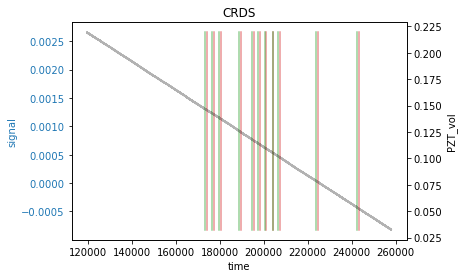

In [68]:
num = 0
min_max = [np.min(new_filted_src[num]), np.max(new_filted_src[num])]
x= np.arange(tri_idxs[num][0],tri_idxs[num][1],1)
fig, ax1 = plt.subplots()
plt.title('CRDS')
plt.xlabel('time')
ax2 = ax1.twinx()
ax1.set_ylabel('signal', color='tab:blue')
for i in new_peak_collect[num]:
    ax1.plot([i,i],min_max, color='tab:red', alpha=0.5)
    
for i in new_drift_collect[num]:
    ax1.plot([i,i], min_max, color='tab:green', alpha=0.5)  
print(new_peak_collect[num])
ax1.plot(x[179999 -750: 179999 + 750],new_filted_src[num][179999 -750: 179999 + 750], color='tab:blue', alpha=0.8)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.set_ylabel('PZT_vol', color='black')
ax2.plot(x, new_triangle_waves[num], color='black', alpha=0.3)
ax2.tick_params

In [69]:
delta = []
for i in range(len(new_peak_collect)):
    for j in range(len(new_peak_collect[i])):
        if(j!=0):
            d = new_peak_collect[i][j] - pre_tmp
            delta.append(d)
        pre_tmp = new_peak_collect[i][j]

[ 0  0  1  3  7 36 24  8  4]
[   0  500 1000 1500 2000 2500 3000 3500 4000 4500]
max= 2500


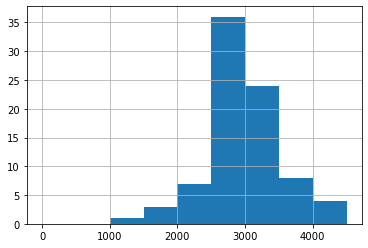

In [74]:
bins = range(0, 5000, 500)
counts, bins = np.histogram(delta,bins)
print(counts)
print(bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.grid()
max_val = bins[np.argmax(counts)]
print("max=",max_val)

max= 2600


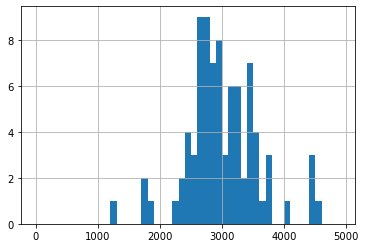

In [72]:
delta = []
for i in range(len(new_drift_collect)):
    for j in range(len(new_peak_collect[i])):
        if(j!=0):
            d = new_drift_collect[i][j] - pre_tmp
            delta.append(d)
        pre_tmp = new_drift_collect[i][j]
bins = range(0, 5000, 100)

counts, bins = np.histogram(delta,bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.grid()
max_val = bins[np.argmax(counts)]
print("max=",max_val)